# Atlanta Police Department
![APD Logo](https://atlantapd.galls.com/photos/partners/atlantapd/logo.jpg)


The Atlanta Police Department provides Part 1 crime data at http://www.atlantapd.org/i-want-to/crime-data-downloads

A recent copy of the data file is stored in the cluster. <span style="color: red; font-weight: bold;">Please, do not copy this data file into your home directory!</span>

# Introduction


- This notebooks leads into an exploration of public crime data provided by the Atlanta Police Department.
- The original data set and supplemental information can be found at http://www.atlantapd.org/i-want-to/crime-data-downloads
- **The data set is available on ARC, please, don't download into your home directory on ARC!**

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
ls -l /home/data/APD/COBRA-YTD*.csv.gz

-rw-r--r-- 1 pmolnar data   763171 Sep 26 13:13 /home/data/APD/COBRA-YTD2017.csv.gz
-rw-r--r-- 1 pmolnar data 11253630 Oct  4 18:41 /home/data/APD/COBRA-YTD-multiyear.csv.gz


In [ ]:
df = pd.read_csv('/home/data/APD/COBRA-YTD-multiyear.csv.gz')

In [13]:
df.shape

(285733, 26)

In [14]:
df.dtypes

MI_PRINX                      int64
offense_id                    int64
rpt_date                     object
occur_date                   object
occur_time                   object
poss_date                    object
poss_time                    object
beat                        float64
apt_office_prefix            object
apt_office_num               object
location                     object
MinOfucr                      int64
MinOfibr_code                object
dispo_code                   object
MaxOfnum_victims            float64
Shift                        object
Avg Day                      object
loc_type                    float64
UC2 Literal                  object
neighborhood                 object
npu                          object
x                           float64
y                           float64
rpt_dt               datetime64[ns]
occur_dt             datetime64[ns]
poss_dt              datetime64[ns]
dtype: object

In [15]:
#brdf = pd.read_csv('/home/pmolnar/burglary_residence.csv')
#brdf.head()

In [ ]:
dataDict = pd.DataFrame({'DataType': df.dtypes.values, 'Description': '', }, index=df.columns.values)

We need to enter the descriptions for each entry in our dictionary manually. However, why not just create a the Python code automatically...

Run the code below only if you haven't edited the `datadict.py` file in a different way, since it will overwrite what you have so far. (That's why the code is commented-out.)

In [ ]:
dataDict

In [ ]:
with open("datadict2.py", "w") as io:
     for i in dataDict.index:
         io.write("dataDict.loc['%s'].Description = '' # type: %s\n" % (i, str(dataDict.loc[i].DataType)))

In [ ]:
ls -l datadict2.py

In [ ]:
# %load datadict.py
dataDict.loc['MI_PRINX'].Description = '' # type: int64
dataDict.loc['offense_id'].Description = 'Unique ID in the format YYDDDNNNN with the year YY, the day of the year DDD and a counter NNNN' # type: int64
dataDict.loc['rpt_date'].Description = 'Date the crime was reported' # type: object
dataDict.loc['occur_date'].Description = 'Estimated date when the crime occured' # type: object
dataDict.loc['occur_time'].Description = 'Estimated time when the crime occured' # type: object
dataDict.loc['poss_date'].Description = '' # type: object
dataDict.loc['poss_time'].Description = '' # type: object
dataDict.loc['beat'].Description = '' # type: int64
dataDict.loc['apt_office_prefix'].Description = '' # type: object
dataDict.loc['apt_office_num'].Description = '' # type: object
dataDict.loc['location'].Description = '' # type: object
dataDict.loc['MinOfucr'].Description = '' # type: int64
dataDict.loc['MinOfibr_code'].Description = '' # type: object
dataDict.loc['dispo_code'].Description = '' # type: object
dataDict.loc['MaxOfnum_victims'].Description = '' # type: float64
dataDict.loc['Shift'].Description = 'Zones have 8 or 10 hour shifts' # type: object
dataDict.loc['Avg Day'].Description = '' # type: object
dataDict.loc['loc_type'].Description = '' # type: float64
dataDict.loc['UC2 Literal'].Description = '' # type: object
dataDict.loc['neighborhood'].Description = '' # type: object
dataDict.loc['npu'].Description = '' # type: object
dataDict.loc['x'].Description = '' # type: float64
dataDict.loc['y'].Description = '' # type: float64
dataDict.to_csv("COBRA_Data_Dictionary.csv")

In [ ]:
sorted(df.npu.unique())

In [ ]:
len(df.neighborhood.unique())

## Fixing Data Types

## Date and Time
- Working with dates can be tricky. Often dates and times are coded as strings and need to be converted to a date and time data format.
- Python provides a module `datetime` to deal with converting parsing and formatting dates and times. See https://docs.python.org/2/library/datetime.html
- The `pandas` package provides functionality to convert text fields into date/time fields...given the values adhere to a given format. See http://pandas.pydata.org/pandas-docs/version/0.20/generated/pandas.to_datetime.html

### Create a proper text field
In order to use the text to date/time converter our text columns need to have the appropriate format.

In [16]:
df[['occur_date', 'occur_time']][0:5]

,occur_date,occur_time
0,02/03/2009,13:50:00
1,02/06/2009,08:50:00
2,06/17/2009,14:00:00
3,07/21/2008,18:00:00
4,10/19/2008,18:30:00


In [18]:
# function currying
def fixdatetime(fld):
    def _fix(s):
        date_col = '%s_date' % fld
        time_col = '%s_time' % fld
        if time_col in s.index:
            return str(s[date_col])+' '+str(s[time_col])
        else:
            return str(s[date_col])+' 00:00:00'
    return _fix

##df.apply(fixdatetime('occur'), axis=1)[:10]

### Convert Columns

In [19]:
for col in ['rpt', 'occur', 'poss']:
    datser = df.apply(fixdatetime(col), axis=1)
    df['%s_dt'%col] = pd.to_datetime(datser, format="%m/%d/%Y %H:%M:%S", errors='coerce')

In [20]:
df.head()

,MI_PRINX,offense_id,rpt_date,occur_date,occur_time,poss_date,poss_time,beat,apt_office_prefix,apt_office_num,...,Avg Day,loc_type,UC2 Literal,neighborhood,npu,x,y,rpt_dt,occur_dt,poss_dt
0,1160569,90360664,02/05/2009,02/03/2009,13:50:00,02/03/2009,15:00:00,305.0,NaN,NaN,...,Tue,35.0,LARCENY-NON VEHICLE,South Atlanta,Y,-84.38654,33.72024,2009-02-05,2009-02-03 13:50:00,2009-02-03 15:00:00
1,1160570,90370891,02/06/2009,02/06/2009,08:50:00,02/06/2009,10:45:00,502.0,NaN,NaN,...,Fri,18.0,LARCENY-FROM VEHICLE,Ansley Park,E,-84.37276,33.79685,2009-02-06,2009-02-06 08:50:00,2009-02-06 10:45:00
2,1160572,91681984,06/17/2009,06/17/2009,14:00:00,06/17/2009,15:00:00,604.0,NaN,816,...,Wed,NaN,LARCENY-NON VEHICLE,Sweet Auburn,M,-84.37521,33.75540,2009-06-17,2009-06-17 14:00:00,2009-06-17 15:00:00
3,1160575,82040835,02/27/2009,07/21/2008,18:00:00,07/21/2008,18:00:00,104.0,NaN,NaN,...,Mon,20.0,BURGLARY-RESIDENCE,Mozley Park,K,-84.44342,33.75265,2009-02-27,2008-07-21 18:00:00,2008-07-21 18:00:00
4,1160576,82922120,01/14/2009,10/19/2008,18:30:00,10/19/2008,19:45:00,210.0,NaN,NaN,...,Sun,18.0,AUTO THEFT,Lenox,B,-84.36212,33.84676,2009-01-14,2008-10-19 18:30:00,2008-10-19 19:45:00


In [21]:
df.dtypes

MI_PRINX                      int64
offense_id                    int64
rpt_date                     object
occur_date                   object
occur_time                   object
poss_date                    object
poss_time                    object
beat                        float64
apt_office_prefix            object
apt_office_num               object
location                     object
MinOfucr                      int64
MinOfibr_code                object
dispo_code                   object
MaxOfnum_victims            float64
Shift                        object
Avg Day                      object
loc_type                    float64
UC2 Literal                  object
neighborhood                 object
npu                          object
x                           float64
y                           float64
rpt_dt               datetime64[ns]
occur_dt             datetime64[ns]
poss_dt              datetime64[ns]
dtype: object

## Beats and Zones
The City of Atlanta is divided into 6 zones. Each with 12 to 14 beats. 

![](https://upload.wikimedia.org/wikipedia/commons/thumb/c/cb/Atlanta_Police_Zones_-_Feb_2013.jpg/588px-Atlanta_Police_Zones_-_Feb_2013.jpg)

Let's create a separate column for the zones:

In [ ]:
df.beat[:10]

In [ ]:
df['Zone'] = df['beat']//100

In [ ]:
df.Zone[:4]

In [ ]:
df['UC2 Literal'].unique()

In [ ]:
##df[df['UC2 Literal']=='LARCENY-FROM VEHICLE']

In [ ]:
df.occur_date.min(), df.occur_date.max()

In [ ]:
df['Year'] = df.rpt_dt.map(lambda d: d.year)

In [ ]:
df.groupby('Year').offense_id.count()

In [ ]:
brdf = df[df['UC2 Literal']=='BURGLARY-RESIDENCE'].copy()

In [ ]:
brdf.shape, df.shape

In [ ]:
def gethour(d):
    return d.hour

brdf.occur_dt.map(gethour)
##brdf['occur_dt'].map(gethour)


##brdf.occur_dt.map(lambda d: d.hour)

In [ ]:
print type(brdf.occur_dt)
brdf['Hour'] = brdf.occur_dt.apply(gethour)

In [ ]:
brdf.head()

In [ ]:
br_hr = brdf.groupby(['Hour']).offense_id.count()

In [ ]:
plt.step(br_hr.index, br_hr.values)

In [ ]:
plt.figure(figsize=(20,8))
for z in range(1,7):
    plt.subplot(3,2,z)
    plt.title("Zone %d" % z)
    #brdf[brdf.Zone==z].hist(column='Hour', bins=24)
    plt.hist(brdf[brdf.Zone==z].Hour, bins=24)
plt.show()

In [ ]:
plt.figure(figsize=(30,15))
for h in range(24):
    plt.subplot(4,6,h+1)
    plt.title("Hour %d" % h)
    #brdf[brdf.Zone==z].hist(column='Hour', bins=24)
    plt.hist(brdf[brdf.Hour==h].Zone, bins=6)
    plt.ylim(0,40) ## sets limit on Y-axis
plt.show()

In [ ]:
df['UC2 Literal'].unique()

In [ ]:
df.groupby(['UC2 Literal', 'Zone']).offense_id.count()

In [ ]:
df['dayofweek'] = df.occur_dt.map(lambda d: d.dayofweek)

In [ ]:
df.groupby(['UC2 Literal','dayofweek']).offense_id.count()

In [ ]:
brdf.apply(lambda r: str(r.location)+', '+str(r.npu), axis=1)

In [ ]:
brdf.apply(np.min, axis=0)

In [ ]:
df.occur_dt.map(lambda d: d.year).unique()

In [ ]:
df['Year'] = df.occur_dt.map(lambda d: d.year)
df2 = df[(df.Year>=2010) & (df.Year<=2017)]
df2.shape, df.shape

# Descriptive Statistics
https://pandas.pydata.org/pandas-docs/stable/basics.html#descriptive-statistics

# Time Series
- https://pandas.pydata.org/pandas-docs/stable/timeseries.html
- https://pandas.pydata.org/pandas-docs/stable/api.html#id10

In [ ]:
df_LarcenyFromVehicle = df2[(df2['UC2 Literal']=='LARCENY-FROM VEHICLE')&(df2.Year==2017)].copy()
agr_LarcenyFromVehicle = df_LarcenyFromVehicle.set_index('occur_dt').resample('W').offense_id.count()
agr_LarcenyFromVehicle

In [ ]:
df_LarcenyFromVehicle["Hour"] = df_LarcenyFromVehicle.occur_dt.map(lambda d: d.hour)

In [ ]:
df_LarcenyFromVehicle.groupby("Hour").offense_id.count()

In [ ]:
hourly = df_LarcenyFromVehicle.resample('H', on='occur_dt').offense_id.count()

In [ ]:
hourly.reset_index().occur_dt.map(lambda d: d.week)

In [ ]:
df3 = pd.DataFrame({"N": hourly})
##df3['Day'] = df3.reset_index().occur_dt ##.map(lambda d: d.day)
df3

In [ ]:
ls

# Plotting
The Pandas package provides a number of plotting features. Let's try them out.
- https://pandas.pydata.org/pandas-docs/stable/api.html#api-dataframe-plotting
- https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.boxplot.html


In [22]:
df.columns

Index([u'MI_PRINX', u'offense_id', u'rpt_date', u'occur_date', u'occur_time',
       u'poss_date', u'poss_time', u'beat', u'apt_office_prefix',
       u'apt_office_num', u'location', u'MinOfucr', u'MinOfibr_code',
       u'dispo_code', u'MaxOfnum_victims', u'Shift', u'Avg Day', u'loc_type',
       u'UC2 Literal', u'neighborhood', u'npu', u'x', u'y', u'rpt_dt',
       u'occur_dt', u'poss_dt'],
      dtype='object')

In [24]:
df['occur_month'] = df['occur_dt'].map(lambda dt: dt.month)

In [29]:
df['occur_year'] = df['occur_dt'].map(lambda dt: dt.year)

In [30]:
resdf = df.groupby(['UC2 Literal', 'occur_year', 'occur_month']).offense_id.count()
resdf.head()

UC2 Literal  occur_year  occur_month
AGG ASSAULT  2004.0      2.0              1
             2007.0      2.0              1
                         3.0              1
             2008.0      12.0             4
             2009.0      1.0            217
Name: offense_id, dtype: int64

In [26]:
resdf_tbl = resdf.reset_index()
resdf_tbl.head()

,UC2 Literal,occur_month,offense_id
0,AGG ASSAULT,1.0,1523
1,AGG ASSAULT,2.0,1383
2,AGG ASSAULT,3.0,1754
3,AGG ASSAULT,4.0,1801
4,AGG ASSAULT,5.0,1979


''

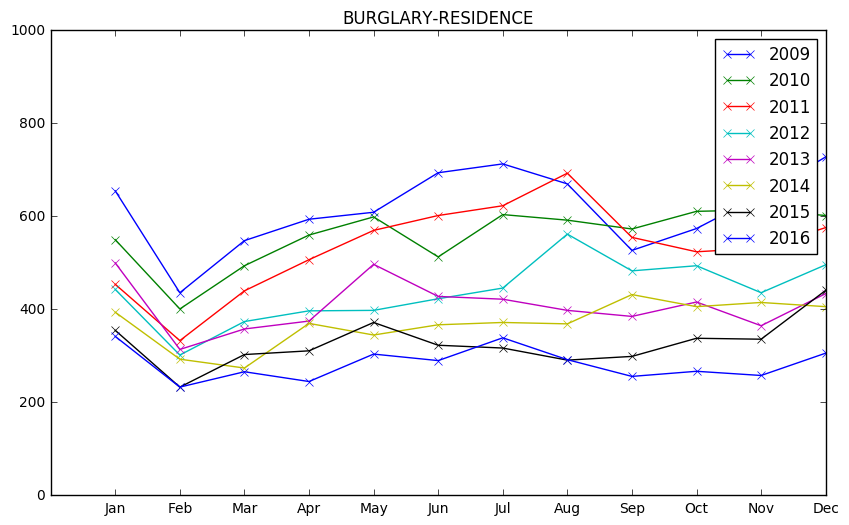

In [38]:
fig = plt.figure(figsize=(10,6))
for yy in range(2009, 2017):
    plt.plot(resdf['BURGLARY-RESIDENCE'][yy].index, resdf['BURGLARY-RESIDENCE'][yy], marker='x', label=str(yy))
plt.legend()
plt.ylim(0, 1000)
plt.title('BURGLARY-RESIDENCE')
plt.xticks(range(13), ['', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
##plt.savefig('quiz3-burglary-residence.png')
;

In [ ]:
fig = plt.figure(figsize=(10,6)) # 10inx10in
#plt.plot(resdf['BURGLARY-RESIDENCE'].index, resdf['BURGLARY-RESIDENCE'])
plt.scatter(resdf['BURGLARY-RESIDENCE'].index, resdf['BURGLARY-RESIDENCE'], marker='x')
plt.scatter(resdf['BURGLARY-NONRES'].index, resdf['BURGLARY-NONRES'], marker='o')

plt.ylim(0, 500)
plt.title('BURGLARY-RESIDENCE')
plt.xticks(range(13), ['', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
fig.savefig('BurglaryResidence_over_month.svg')
x = 1

# Seasonal Model

In [ ]:
fig = plt.figure(figsize=(40,30))
crime_types = crime_year.index.levels[0]
years = crime_year.index.levels[1]
for c in range(len(crime_types)):
    y_max = max(crime_year.loc[crime_types[c]])
    
    plt.subplot(4,3,c+1)
    plt.hlines(crime_year.loc[crime_types[c]].iloc[-1]*100/y_max, years[0], years[-1], linestyles="dashed", color="r")
    plt.bar(crime_year.loc[crime_types[c]].index, crime_year.loc[crime_types[c]]*100/y_max, label=crime_types[c], alpha=0.5)
    ##plt.legend()
    plt.ylim(0, 100)
    plt.xticks(years+0.4, [str(int(y)) for y in years], rotation=0, fontsize=24)
    plt.yticks([0,20,40,60,80,100], ['0%','20%','40%','60%','80%','100%'], fontsize=24)
    plt.title(crime_types[c], fontsize=30)
    None

In [ ]:
c = 3 ## 'BURGLARY-RESIDENCE'
resburglaries = crime_year_month.loc[crime_types[c]]
fig = plt.figure(figsize=(20,10))
for y in years:
    plt.plot(resburglaries.loc[y].index, resburglaries.loc[y], label=("%4.0f"%y))
plt.legend()
plt.title("Seasonal Trends - %s"%crime_types[c], fontsize=20)
plt.xticks(range(13), ['', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlim(0,13)
None

In [ ]:
c = 3 ## 'BURGLARY-RESIDENCE'
fig = plt.figure(figsize=(20,10))
for y in years:
    avg = resburglaries.loc[y].mean()
    std = resburglaries.loc[y].std()
    ##plt.hlines(avg, 1, 13, linestyle='dashed')
    plt.plot(resburglaries.loc[y].index, (resburglaries.loc[y]-avg)/std, label=("%4.0f"%y))
plt.legend()
plt.title("Seasonal Trends - %s (normalized)"%crime_types[c], fontsize=20)
plt.xticks(list(range(1,13)), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlim(0,13)
plt.ylabel("Standard deviations $\sigma_y$")
None